In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling import ProfileReport

In [2]:
#Disable warning in Anaconda
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv('location_rev.csv')
df.head()

revenue  num_competitors  median_income  num_loyalty_members  \
0  42247.80                3       30527.57                 1407   
1  38628.37                3       30185.49                 1025   
2  39715.16                1       32182.24                 1498   
3  35593.30                5       29728.65                 2340   
4  35128.18                4       30691.17                  847   

   population_density  location_age  
0                3302            12  
1                4422            11  
2                3260            12  
3                4325            10  
4                3774            11

#### Use pandas profiling to get a quick overview of the data

In [4]:
profile = ProfileReport(df,title='Revenue Data')
profile

Summarize dataset:   0%|          | 0/20 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

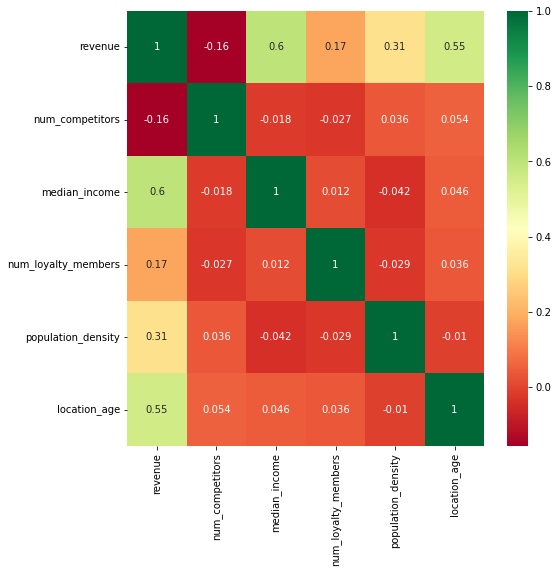

In [5]:
#Plot the heat map
plt.figure(figsize = (8,8))
sns.heatmap(df.corr(),annot = True,cmap = 'RdYlGn')

#### Since the correlation of median_income and revenue is significant, we create regplot and residual plot to observe the relationship between the two features

<AxesSubplot:xlabel='median_income', ylabel='revenue'>

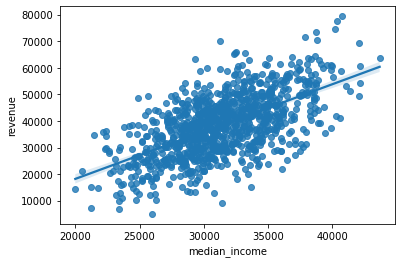

In [6]:
#Create a regplot between 'median_income' and 'revenue'
sns.regplot(x='median_income',y='revenue',data=df)

<AxesSubplot:xlabel='median_income', ylabel='revenue'>

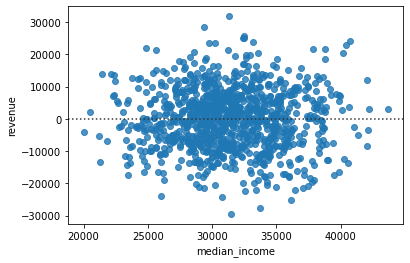

In [7]:
#Residplot - plot of residuals
sns.residplot(x='median_income',y='revenue',data=df)

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
#Split the data into training and testing sets
X1 = df[['median_income']] #convert into 2D since X is a matrix
y1 = df['revenue']
X_train, X_test, y_train, y_test = train_test_split(X1,y1,test_size=0.2,random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression

In [11]:
#Create a linear regression model
model = LinearRegression()

In [12]:
#Fit the model to the training data
model.fit(X_train,y_train)

LinearRegression()

In [13]:
y1_pred = model.predict(X_test)

In [14]:
#Intercept and coefficient y = a0 + a1x + residual
print(model.intercept_) #a0
print(model.coef_) #a1

-16480.380393249892
[1.7529175]


In [15]:
#R-squared
model.score(X_test,y_test)

0.38274638263592353

In [16]:
#Mean squared error, mean absolute error, and root mean squared error
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [17]:
mse = mean_squared_error(y_test,y1_pred)
mae = mean_absolute_error(y_test,y1_pred)
rmse = np.sqrt(mse)

In [18]:
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 86324228.14218265
Mean Absolute Error: 7625.873763741532
Root Mean Squared Error: 9291.083259888626


#### Plot the regression line
- Plot the y = y-hat (the red line), with the assumption of predicted values equal to actual values
- The closer the data point to the line are, the more accurate the prediction is

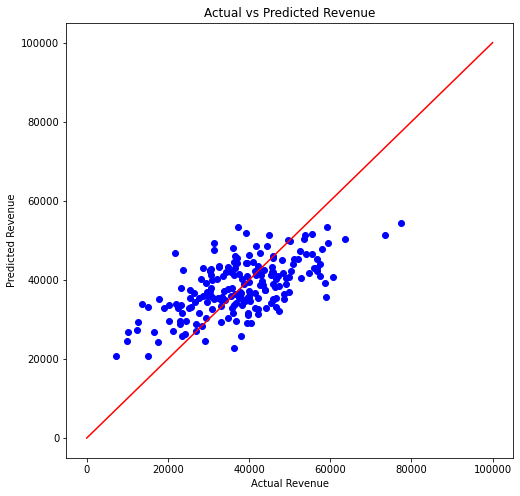

In [19]:
plt.figure(figsize = (8,8))
plt.scatter(y_test,y1_pred,c = 'blue')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.plot([0,100000],[0,100000],c = 'red')

#### Insights:
- The accuracy of the prediction model is not high, since the data point are quite far from the red line
- However, the R-squared of model is only 38%, needed to improve the yield higher accuracy

#### Multiple Linear Regression

In [20]:
X2 = df.drop(['revenue'],axis = 1)
y2 = df['revenue']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X2,y2,test_size=0.2,random_state=42)

In [22]:
#Create, fit, and transfrom
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [23]:
y_pred = model.predict(X_test)

In [24]:
print(model.intercept_) #a0
print(model.coef_) #a1 --> a5 of 5 dependant features

-51288.646172415305
[-2.08947163e+03  1.72577149e+00  3.51155871e+00  4.22884015e+00
  2.07374090e+03]


In [25]:
model.score(X_test,y_test)

0.8086918921337007

In [26]:
mse = mean_squared_error(y_test,y1_pred)
mae = mean_absolute_error(y_test,y1_pred)
rmse = np.sqrt(mse)
print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'Root Mean Squared Error: {rmse}')

Mean Squared Error: 86324228.14218265
Mean Absolute Error: 7625.873763741532
Root Mean Squared Error: 9291.083259888626


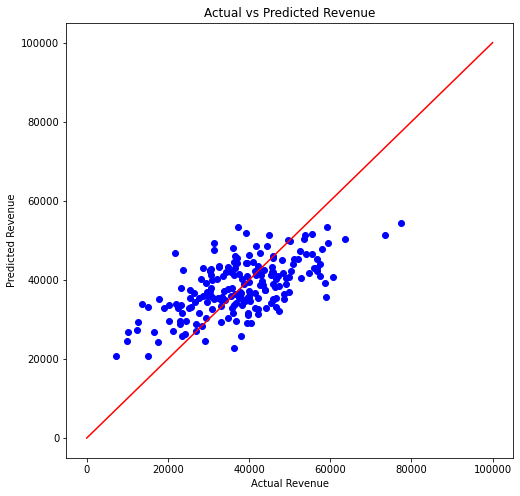

In [27]:
plt.figure(figsize = (8,8))
plt.scatter(y_test,y1_pred,c = 'blue')
plt.xlabel('Actual Revenue')
plt.ylabel('Predicted Revenue')
plt.title('Actual vs Predicted Revenue')
plt.plot([0,100000],[0,100000],c = 'red')

#### Insights:
In comparison, the multiple linear regression model perform better the the previous, in which the R-squared of multiple linear regression reach over 80%

Text(0.5, 0.98, 'Actual vs Predict Values for Revenue in Training and Testing sets')

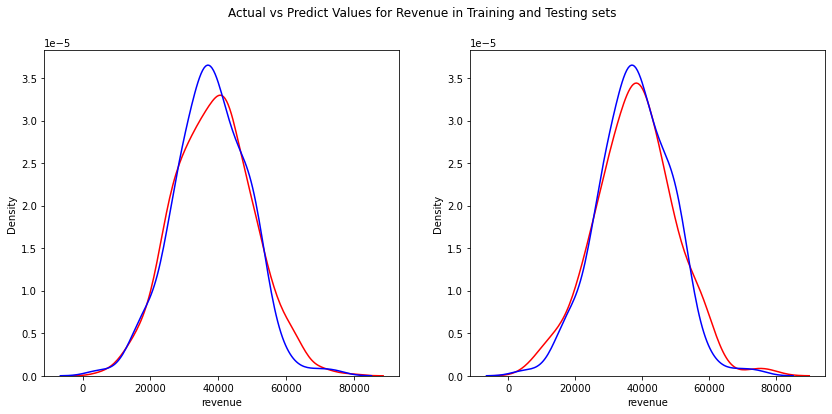

In [28]:
#Plot the distribution of the revenue in training and testing sets
plt.figure(figsize = (14,6))

#Training set
plt.subplot(1,2,1)
ax1 = sns.distplot(y_train, hist = False, color = 'r',label = 'Actual Training Value')
sns.distplot(y_pred, hist = False, color = 'b', label = 'Predicted Training Value',ax = ax1)

#Testing set
plt.subplot(1,2,2)
ax2 = sns.distplot(y_test, hist = False, color = 'r',label = 'Actual Training Value')
sns.distplot(y_pred, hist = False, color = 'b', label = 'Predicted Training Value', ax = ax2)

#Title
plt.suptitle('Actual vs Predict Values for Revenue in Training and Testing sets')

#### Insights:
Distributions of predict and actual values are relatively matching, meaning that the accuracy of the multiple linear regression model is quite high

#### Select KBest

In [29]:
#Univariate selection
from sklearn.feature_selection import SelectKBest, f_regression

In [30]:
#Apply SelectKbest to extract top features
selector = SelectKBest(f_regression, k='all')
fit = selector.fit(X_train, y_train)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X_train.columns)

In [31]:
#Concat two dataframes for better visualization
featureScores = pd.concat([df_columns, df_scores],axis = 1)
featureScores.columns = ['Feature','Score'] #Naming the dataframe columns
#Sort the dataframe by score in descending order
featureScores.sort_values(by='Score',ascending = False,inplace = True)

In [32]:
featureScores

Feature       Score
1        median_income  441.912898
4         location_age  351.189293
3   population_density   88.560961
2  num_loyalty_members   25.392022
0      num_competitors   25.310076